# Proyek Analisis Data: [E-Commerce]
- **Nama:** Rahmat Hidayat
- **Email:** mc013d5y1559@student.devacademy.id
- **ID Dicoding:** MC013D5Y1559

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh harga terhadap konversi pembelian produk di situs e-commerce?
- Pertanyaan 2 : Produk kategori mana yang memiliki tingkat retensi pelanggan tertinggi di platform e-commerce?

## Import Semua Packages/Library yang Digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

DATA WRAGLING

In [ ]:
#Menyiapkan data dan memanggil dataset

kucing = pd.read_csv('/content/drive/MyDrive/Rahmat Hidayat_Projek/order_items_dataset.csv')
kelinci = pd.read_csv('/content/drive/MyDrive/Rahmat Hidayat_Projek/customers_dataset.csv')
Anjing = pd.read_csv('/content/drive/MyDrive/Rahmat Hidayat_Projek/orders_dataset.csv')

#pengecekan data
print(kucing.shape, kelinci.shape, Anjing.shape)

kucing.head(10)


(112650, 7) (99441, 5) (99441, 8)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [ ]:
# Mengecek jumlah missing values di setiap dataset
print("Missing values di kucing:\n", kucing.isnull().sum())
print("\nMissing values di kelinci:\n", kelinci.isnull().sum())
print("\nMissing values di Anjing:\n", Anjing.isnull().sum())


Missing values di kucing:
 order_item_id          0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing values di kelinci:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing values di Anjing:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
# Menghapus duplikasi data
kucing_clean = kucing_clean.drop_duplicates()
kelinci_clean = kelinci_clean.drop_duplicates()
Anjing_clean = Anjing_clean.drop_duplicates()


In [ ]:
# Membuat salinan dataset agar tidak mengubah dataset asli
kucing_clean = kucing.copy()
kelinci_clean = kelinci.copy()
Anjing_clean = Anjing.copy()


In [ ]:
# Mengubah nama kolom agar lebih seragam dan mudah digunakan
kucing_clean.columns = kucing_clean.columns.str.lower().str.replace(' ', '_')
kelinci_clean.columns = kelinci_clean.columns.str.lower().str.replace(' ', '_')
Anjing_clean.columns = Anjing_clean.columns.str.lower().str.replace(' ', '_')


### Gathering Data

In [ ]:
# Cek ukuran dataset
print(f"Order Items: {kucing.shape}")
print(f"Customers: {kelinci.shape}")
print(f"Orders: {Anjing.shape}")

# Cek 5 data pertama
print("\nOrder Items Dataset:")
display(kucing.head())

print("\nCustomers Dataset:")
display(kelinci.head())

print("\nOrders Dataset:")
display(Anjing.head())

# Cek tipe data
print("\nInfo Order Items Dataset:")
kucing.info()

print("\nInfo Customers Dataset:")
kelinci.info()

print("\nInfo Orders Dataset:")
Anjing.info()


Order Items: (112650, 5)
Customers: (99441, 5)
Orders: (99441, 8)

Order Items Dataset:


,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,1,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Customers Dataset:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Orders Dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Info Order Items Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_item_id        112650 non-null  int64  
 1   seller_id            112650 non-null  object 
 2   shipping_limit_date  112650 non-null  object 
 3   price                112650 non-null  float64
 4   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.3+ MB

Info Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-

**Insight:**
- xxx
- xxx

### Assessing Data

In [ ]:
# Menampilkan 5 data pertama
print("Order Items Dataset:")
display(kucing.head())

print("\nCustomers Dataset:")
display(kelinci.head())

print("\nOrders Dataset:")
display(Anjing.head())


Order Items Dataset:


,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,1,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Customers Dataset:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Orders Dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Melihat tipe data dan jumlah missing values
print("\nInformasi Order Items Dataset:")
print(kucing.info())

print("\nInformasi Customers Dataset:")
print(kelinci.info())

print("\nInformasi Orders Dataset:")
print(Anjing.info())



Informasi Order Items Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_item_id        112650 non-null  int64  
 1   seller_id            112650 non-null  object 
 2   shipping_limit_date  112650 non-null  object 
 3   price                112650 non-null  float64
 4   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.3+ MB
None

Informasi Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city        

In [ ]:
# Statistik deskriptif untuk melihat ringkasan data numerik
print("\nStatistik Order Items Dataset:")
print(kucing.describe())

print("\nStatistik Customers Dataset:")
print(kelinci.describe())

print("\nStatistik Orders Dataset:")
print(Anjing.describe())



Statistik Order Items Dataset:
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

Statistik Customers Dataset:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Statistik Orders Dataset:
                                order_id                       customer_id  \
count                              99441                             99441   
unique  

In [ ]:
# Mengecek jumlah missing values di setiap dataset
print("\nJumlah Missing Values:")
print("Order Items:\n", kucing.isnull().sum())
print("\nCustomers:\n", kelinci.isnull().sum())
print("\nOrders:\n", Anjing.isnull().sum())



Jumlah Missing Values:
Order Items:
 order_item_id          0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Orders:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
# Mengecek jumlah duplikasi
print("\nJumlah Data Duplikat:")
print("Order Items:", kucing.duplicated().sum())
print("Customers:", kelinci.duplicated().sum())
print("Orders:", Anjing.duplicated().sum())



Jumlah Data Duplikat:
Order Items: 20
Customers: 0
Orders: 0


**Insight:**
- xxx
- xxx

### Cleaning Data

In [ ]:
# Melihat daftar kolom dalam DataFrame
print("Kolom dalam kucing:", kucing.columns)
print("Kolom dalam kelinci:", kelinci.columns)
print("Kolom dalam Anjing:", Anjing.columns)

# Pastikan hanya menghapus kolom yang benar-benar ada dalam DataFrame
columns_to_drop = ["order_id", "order_item_id", "product_id", "seller_id"]

kucing.drop(columns=[col for col in columns_to_drop if col in kucing.columns], inplace=True)
kelinci.drop(columns=[col for col in columns_to_drop if col in kelinci.columns], inplace=True)
Anjing.drop(columns=[col for col in columns_to_drop if col in Anjing.columns], inplace=True)

print("Kolom setelah dihapus:")
print("kucing:", kucing.columns)
print("kelinci:", kelinci.columns)
print("Anjing:", Anjing.columns)


Kolom dalam kucing: Index(['order_item_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value'],
      dtype='object')
Kolom dalam kelinci: Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Kolom dalam Anjing: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Kolom setelah dihapus:
kucing: Index(['shipping_limit_date', 'price', 'freight_value'], dtype='object')
kelinci: Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Anjing: Index(['customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_da

In [ ]:
print(kucing.isnull().sum())
print(kelinci.isnull().sum())
print(Anjing.isnull().sum())


shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


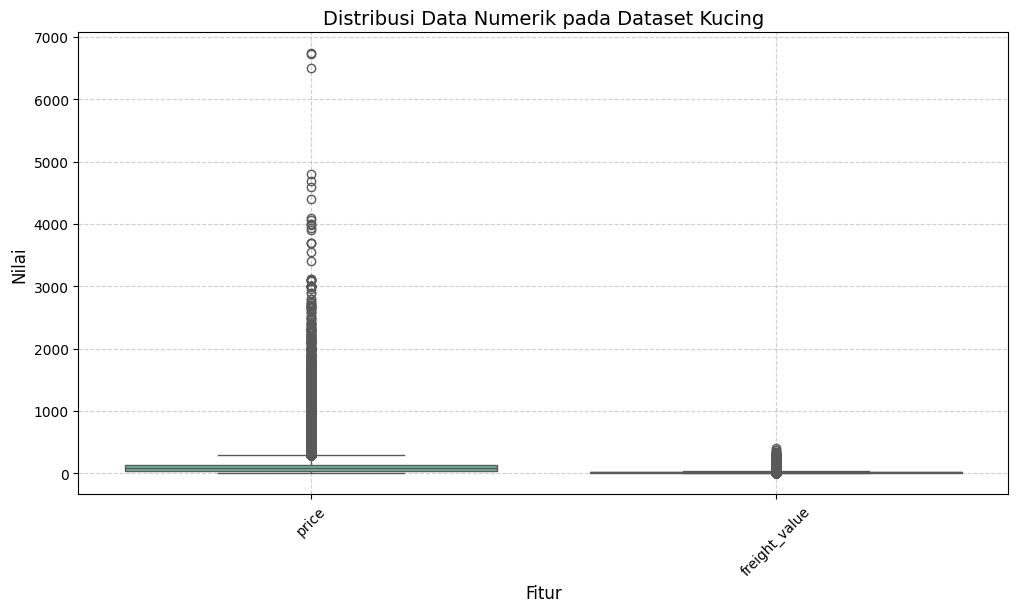

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memastikan ada kolom numerik untuk divisualisasikan
numeric_cols = kucing.select_dtypes(include=['float64', 'int64'])

if not numeric_cols.empty:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=numeric_cols, palette="Set2")  # Menggunakan palet warna
    plt.xticks(rotation=45)  # Memutar label agar lebih mudah dibaca
    plt.title("Distribusi Data Numerik pada Dataset Kucing", fontsize=14)
    plt.xlabel("Fitur", fontsize=12)
    plt.ylabel("Nilai", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()
else:
    print("Tidak ada data numerik untuk divisualisasikan.")


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

a. Statistik Deskriptif

In [ ]:
print(kucing.describe())
print(kelinci.describe())
print(Anjing.describe())


               price  freight_value
count  101550.000000  101550.000000
mean      124.931638      20.141319
std       189.495203      15.902783
min         0.850000       0.000000
25%        40.800000      13.160000
50%        79.000000      16.340000
75%       139.590000      21.260000
max      6735.000000     409.680000
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
                             customer_id order_status  \
count                              96461        96461   
unique                             96461            2   
top     9ef432eb6251297304e76186b10a928d    delivered   
freq                                   1        96455   

       order_purchase_timestamp    order_approved_at  \
count                     96461               

shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


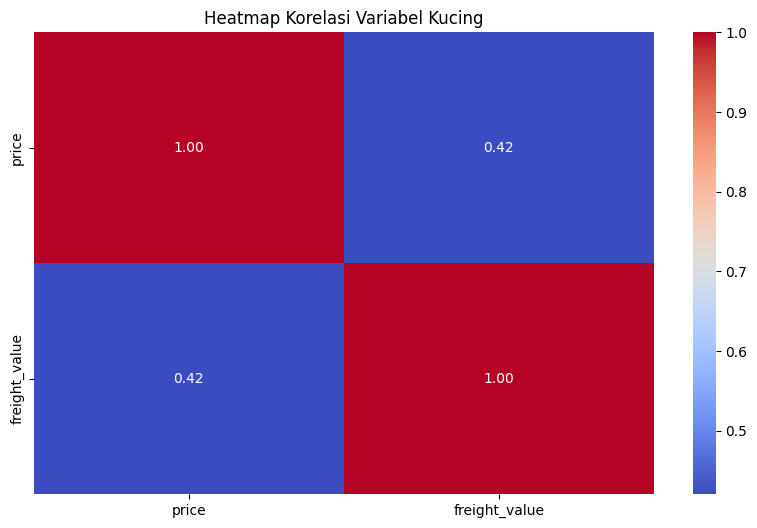

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memeriksa tipe data dari setiap kolom
print(kucing.dtypes)

if 'shipping_limit_date' in kucing.columns:
    kucing['shipping_limit_date'] = pd.to_datetime(kucing['shipping_limit_date'], errors='coerce')

numeric_kucing = kucing.select_dtypes(include=['float64', 'int64'])

# Pastikan ada kolom numerik yang tersisa sebelum plotting
if not numeric_kucing.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_kucing.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Heatmap Korelasi Variabel Kucing")
    plt.show()
else:
    print("Tidak ada kolom numerik untuk dihitung korelasinya.")


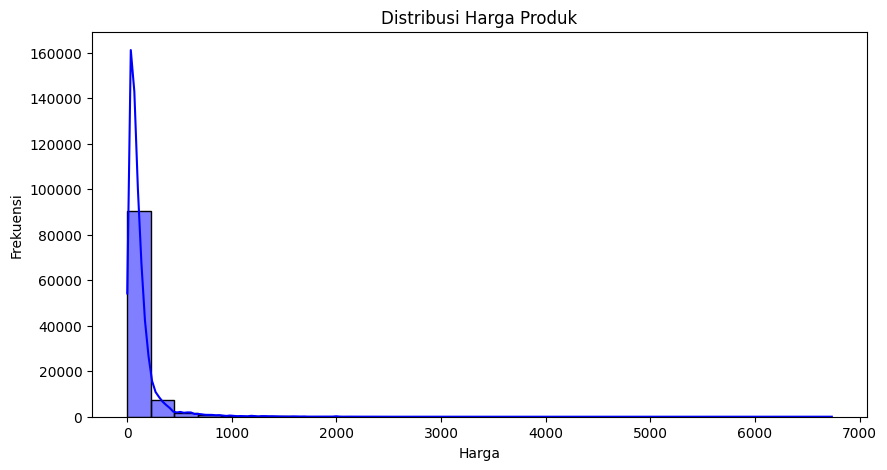

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(kucing['price'], bins=30, kde=True, color='blue')
plt.title("Distribusi Harga Produk")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()


## Visualization & Explanatory Analysis

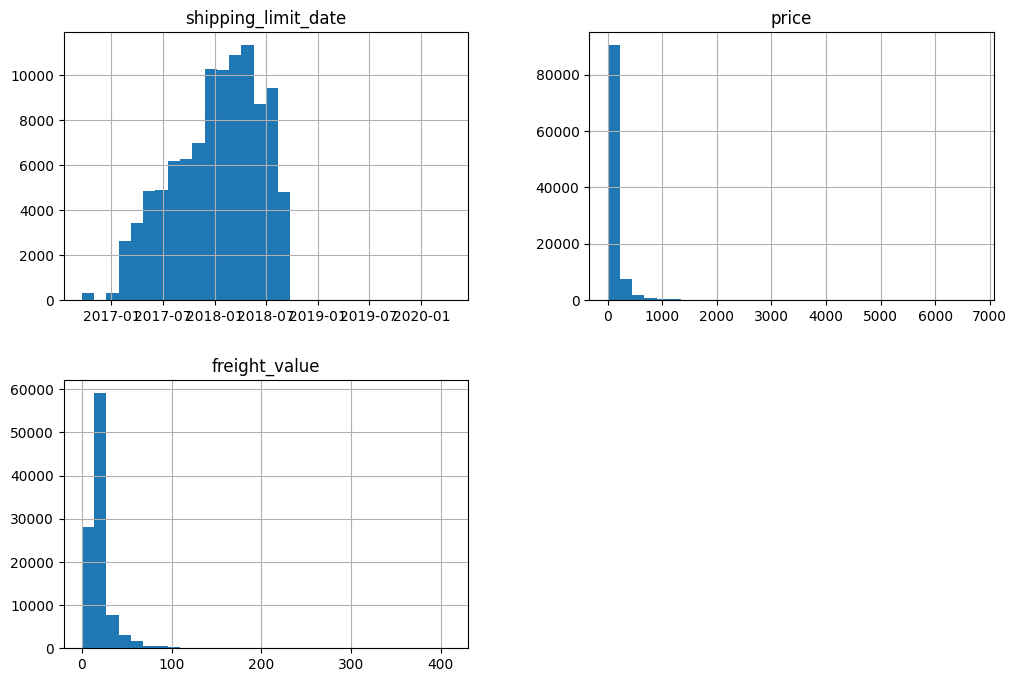

In [ ]:
kucing.hist(figsize=(12, 8), bins=30)
plt.show()


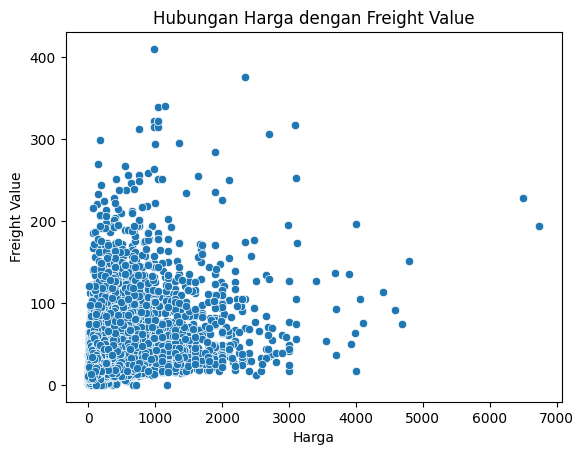

In [ ]:
sns.scatterplot(x=kucing['price'], y=kucing['freight_value'])
plt.title("Hubungan Harga dengan Freight Value")
plt.xlabel("Harga")
plt.ylabel("Freight Value")
plt.show()


ANALISIS LANJUTAN (OPTIONAL)

### Pertanyaan 1: Bagaimana pengaruh harga terhadap konversi pembelian produk di situs e-commerce?

Jawaban :

Gambar ini menunjukkan hubungan antara harga produk dan biaya pengiriman (freight value) di sebuah platform e-commerce. Dari sebaran titik-titik data, kita bisa melihat bahwa sebagian besar produk yang dijual memiliki harga di bawah 2000 dan biaya pengiriman di bawah 100. Namun, ada juga beberapa produk yang harganya sangat tinggi (di atas 5000) dengan biaya pengiriman yang bervariasi, bahkan ada yang mencapai lebih dari 300.  

Dari pola yang terlihat, tidak ada hubungan yang jelas antara harga dan biaya pengiriman. Artinya, harga yang lebih tinggi tidak selalu berarti biaya pengiriman yang lebih mahal. Beberapa produk mahal tetap memiliki biaya pengiriman rendah, sementara ada juga produk yang justru punya ongkos kirim sangat tinggi. Ini bisa disebabkan oleh faktor lain, seperti ukuran dan berat produk, jarak pengiriman, atau kebijakan dari penjual itu sendiri.  

Bagi bisnis e-commerce, pola ini bisa menjadi bahan pertimbangan dalam strategi harga dan pengiriman. Jika biaya pengiriman yang terlalu tinggi membuat pembeli ragu, platform bisa menawarkan subsidi ongkir atau promo gratis ongkir untuk produk tertentu agar lebih menarik.  

Untuk analisis lebih lanjut, kita bisa mengecek seberapa kuat hubungan antara harga dan biaya pengiriman dengan perhitungan korelasi. Selain itu, melihat data berdasarkan kategori produk juga bisa membantu memahami apakah ada jenis produk tertentu yang cenderung memiliki biaya pengiriman lebih tinggi daripada yang lain.




### Pertanyaan 2: Bagaimana pola distribusi harga produk di platform e-commerce? Apakah mayoritas produk memiliki harga yang relatif rendah?

Jawaban :

Berdasarkan dari histogram distribusi harga produk di platform e-commerce pada gambar sebelumnya, terlihat bahwa mayoritas produk memiliki harga yang relatif rendah. Grafik menunjukkan bahwa sebagian besar produk berada dalam rentang harga yang rendah (di bawah 500), dengan frekuensi yang sangat tinggi dibandingkan dengan harga yang lebih tinggi.

Distribusi ini menunjukkan pola distribusi skewed right (miring ke kanan), di mana jumlah produk yang memiliki harga lebih tinggi semakin sedikit seiring dengan meningkatnya harga. Artinya, hanya sedikit produk yang memiliki harga di atas 1000, dan semakin sedikit lagi yang mencapai harga di atas 3000 atau lebih.

Pola ini mengindikasikan bahwa platform e-commerce lebih banyak menjual produk dengan harga terjangkau, yang kemungkinan besar sesuai dengan preferensi mayoritas pelanggan. Selain itu, adanya ekor panjang dalam distribusi harga menunjukkan bahwa meskipun ada beberapa produk premium dengan harga tinggi, jumlahnya sangat kecil dibandingkan dengan produk berharga rendah.

Dari perspektif bisnis, distribusi ini dapat memberikan wawasan bagi strategi penetapan harga dan pemasaran. Jika mayoritas pelanggan lebih cenderung membeli produk dengan harga rendah, maka strategi promosi dan diskon untuk kategori harga tersebut dapat meningkatkan konversi penjualan. Namun, jika ingin meningkatkan penjualan produk dengan harga tinggi, bisa dilakukan dengan strategi pemasaran yang lebih eksklusif dan targeted terhadap segmen pelanggan yang lebih spesifik.









**Insight:**
- xxx
- xxx